<a href="https://colab.research.google.com/github/skarthi369/house_price-predictiion/blob/main/tweeter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Tweets.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Tweets.csv'

In [ ]:
from google.colab import files


uploaded = files.upload()


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install textblob
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob # Import TextBlob

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()  # convert to lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)

def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['text'].apply(sentiment_analysis)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

plt.hist(df['sentiment'], bins=50)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


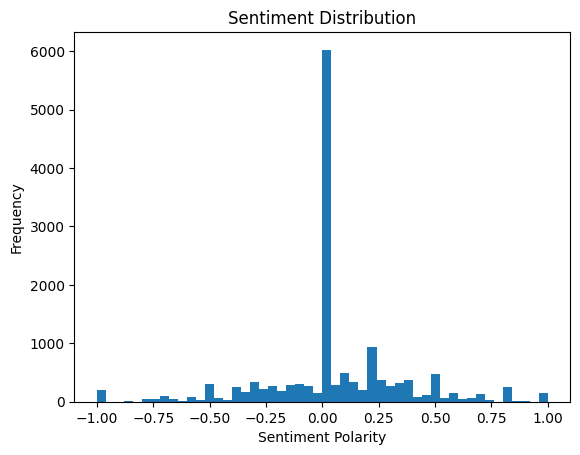

ValueError: Unknown label type: (array([-5.00000000e-01,  5.55111512e-17, -1.28571429e-01, ...,
        0.00000000e+00, -4.00000000e-01,  3.00000000e-01]),)

In [ ]:
import nltk
nltk.download('punkt')
!pip install textblob
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob # Import TextBlob

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()  # convert to lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)

def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['text'].apply(sentiment_analysis)

import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

plt.hist(df['sentiment'], bins=50)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

# Import train_test_split
from sklearn.model_selection import train_test_split

X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

y_pred = nb.predict(X_test_count)

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X = df['text']
# Convert sentiment scores to discrete classes
y = df['sentiment'].apply(lambda score: 1 if score > 0 else (0 if score == 0 else -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count, y_train) # Now y_train contains discrete class labels

y_pred = nb.predict(X_test_count)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary metrics

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.807035519125683
Classification Report:
              precision    recall  f1-score   support

          -1       0.78      0.71      0.74       682
           0       0.87      0.81      0.84      1171
           1       0.76      0.86      0.81      1075

    accuracy                           0.81      2928
   macro avg       0.80      0.80      0.80      2928
weighted avg       0.81      0.81      0.81      2928

Confusion Matrix:
[[486  65 131]
 [ 66 950 155]
 [ 71  77 927]]


In [ ]:
!pip install seaborn==0.12.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


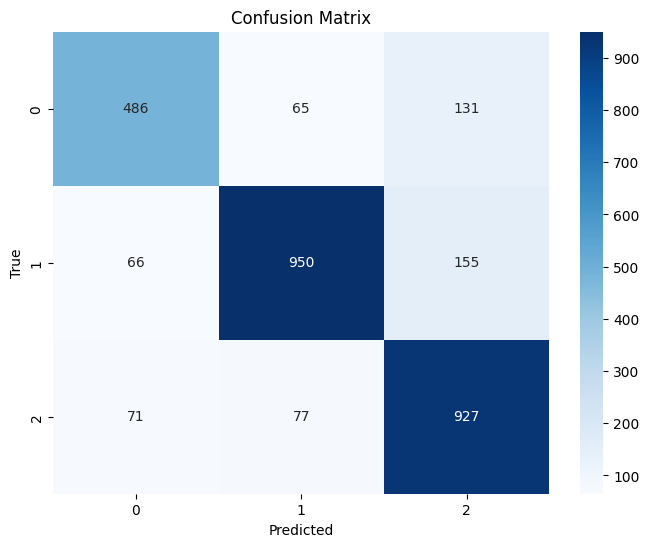

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()